In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv
/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv
/kaggle/input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_df = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv", low_memory=False)

In [4]:
movies_df.info()
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
missing_values = movies_df.isnull().sum()
print(missing_values)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [7]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
def stats(column):
    statistics = []
    mean_val = movies_df[column].mean()
    median_val = movies_df[column].median()
    mode_val = movies_df[column].mode()[0]
    q1 = movies_df[column].quantile(0.25)
    q3 = movies_df[column].quantile(0.75)
    maxi = movies_df[column].max()
    mini = movies_df[column].min()
    statistics.append(mean_val)
    statistics.append(median_val)
    statistics.append(mode_val)
    statistics.append(q1)
    statistics.append(q3)
    statistics.append(maxi)
    statistics.append(mini)
    return statistics

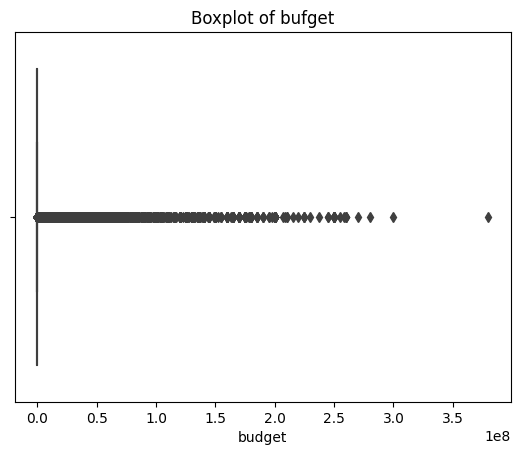

In [9]:
sns.boxplot(x=movies_df['budget'])
plt.title("Boxplot of bufget")
plt.savefig("box_plot_budget.png",dpi=700)
plt.show()

In [10]:
print(stats('popularity'))

[2.9214783449186092, 1.127685, 0.0, 0.38594775, 3.67890225, 547.488298, 0.0]


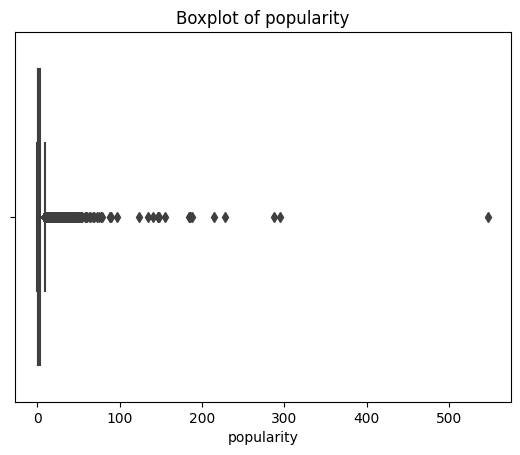

In [11]:
sns.boxplot(x=movies_df['popularity'])
plt.title("Boxplot of popularity")
plt.savefig("box_plot_popularity.png", dpi=700)
plt.show()

In [12]:
print(stats('revenue'))

[11209348.539265288, 0.0, 0.0, 0.0, 0.0, 2787965087.0, 0.0]


In [13]:
print(stats('runtime'))

[94.12819945578833, 95.0, 90.0, 85.0, 107.0, 1256.0, 0.0]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


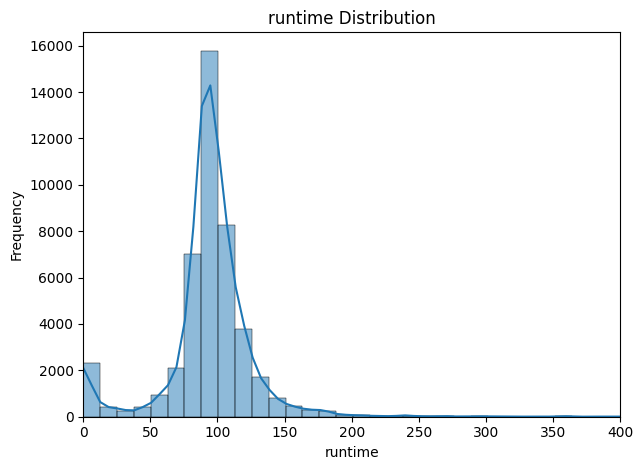

In [14]:
sns.histplot(movies_df['runtime'], bins=100, kde=True)
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('runtime Distribution')
plt.tight_layout()
plt.xlim(0,400)
plt.savefig("runtime_distribuition.png", dpi=700)
plt.show()

In [15]:
print(stats('vote_count'))

[109.89733831940167, 10.0, 1.0, 3.0, 34.0, 14075.0, 0.0]


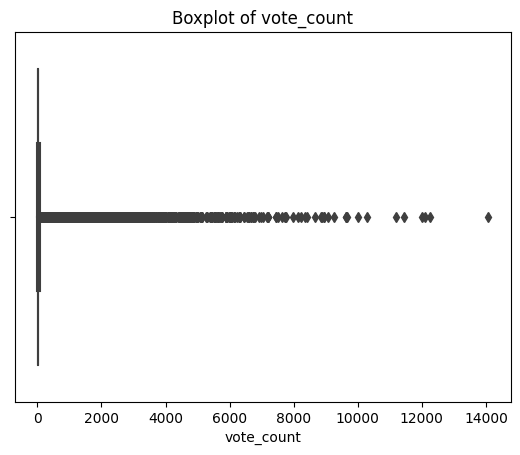

In [16]:
sns.boxplot(x=movies_df['vote_count'])
plt.title("Boxplot of vote_count")
plt.savefig("box_plot_vote_.png", dpi=700)
plt.show()

In [17]:
print(stats('vote_average'))

[5.618207215134183, 6.0, 0.0, 5.0, 6.8, 10.0, 0.0]


In [18]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       3
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         3
production_countries         3
release_date                90
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [19]:
print(stats('budget'))

[4224578.813474693, 0.0, 0.0, 0.0, 0.0, 380000000.0, 0.0]


In [20]:
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].fillna("")
movies_df['homepage'] = movies_df['homepage'].fillna("")
movies_df['imdb_id'] = movies_df['imdb_id'].fillna(0)
movies_df['original_language'] = movies_df['original_language'].fillna(movies_df['original_language'].mode()[0])
movies_df['overview'] = movies_df['overview'].fillna("")
movies_df['popularity'] = movies_df['popularity'].fillna(movies_df['popularity'].median())
movies_df['revenue'] = movies_df['revenue'].fillna(movies_df['revenue'].mean())
movies_df['budget'] = movies_df['budget'].fillna(movies_df['budget'].mean())
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].median())
movies_df['vote_count'] = movies_df['vote_count'].fillna(movies_df['vote_count'].median())
movies_df['vote_average'] = movies_df['vote_average'].fillna(movies_df['vote_average'].mean())
movies_df['status'] = movies_df['vote_average'].fillna("released")
movies_df['tagline'] = movies_df['tagline'].fillna("")
movies_df['production_companies'] = movies_df['production_companies'].fillna(movies_df['production_companies'].mode()[0])
movies_df['production_countries'] = movies_df['production_countries'].fillna(movies_df['production_countries'].mode()[0])
movies_df['release_date'] = movies_df['release_date'].fillna(movies_df['release_date'].max())


In [21]:
movies_df['year'] = movies_df['release_date'].dt.year

In [22]:
missing_values = movies_df.isnull().sum()
print(missing_values)

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path              386
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           6
status                     0
tagline                    0
title                      6
video                      6
vote_average               0
vote_count                 0
year                       0
dtype: int64


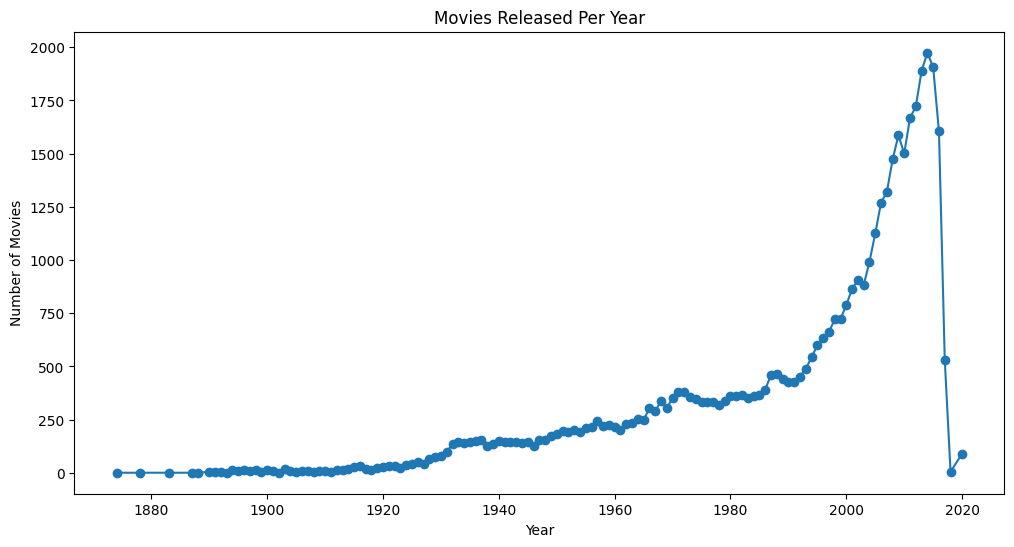

In [23]:
movies_df['release_year'] = movies_df['release_date'].dt.year
yearly_movies = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_movies.index, yearly_movies.values, marker='o')
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.savefig("Movies released per year.png", dpi=700)
plt.show()

In [24]:
budget_per_year = movies_df.groupby('year')['budget'].sum()

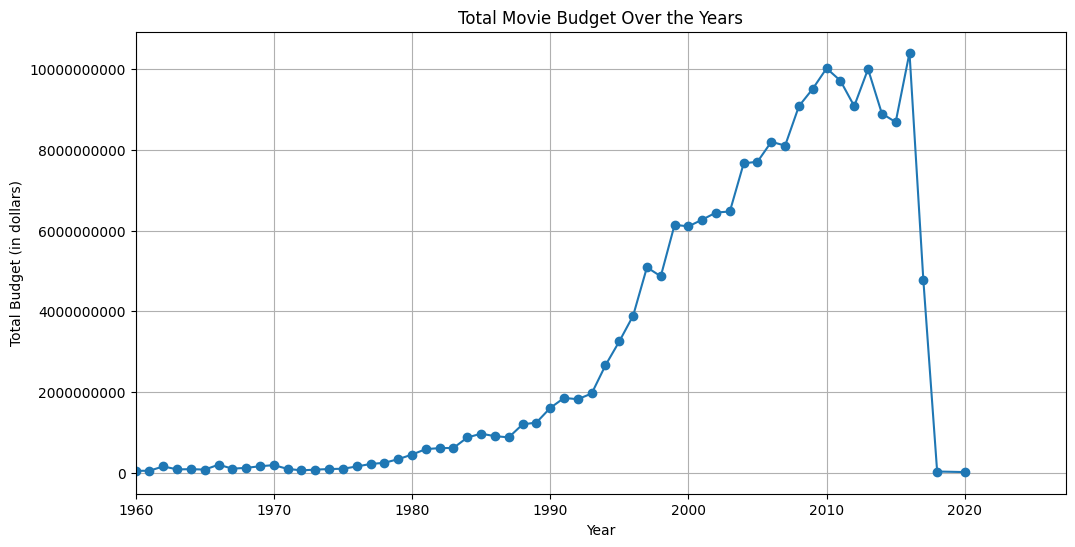

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(budget_per_year.index, budget_per_year.values, marker='o', linestyle='-')

plt.title("Total Movie Budget Over the Years")
plt.xlabel("Year")
plt.xlim(1960)
plt.ylabel("Total Budget (in dollars)")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.savefig("movie budget.png", dpi=700)

plt.show()


In [26]:
top_10_budget = movies_df.nlargest(10, 'budget')
print(top_10_budget[['title', 'budget']])

                                             title       budget
17124  Pirates of the Caribbean: On Stranger Tides  380000000.0
11827     Pirates of the Caribbean: At World's End  300000000.0
26558                      Avengers: Age of Ultron  280000000.0
11067                             Superman Returns  270000000.0
16130                                      Tangled  260000000.0
18685                                  John Carter  260000000.0
44842                Transformers: The Last Knight  260000000.0
11780                                 Spider-Man 3  258000000.0
21175                              The Lone Ranger  255000000.0
13893       Harry Potter and the Half-Blood Prince  250000000.0


In [27]:
top_10_revenue = movies_df.nlargest(10, 'revenue')
print(top_10_revenue[['title', 'revenue']])

                                              title       revenue
14551                                        Avatar  2.787965e+09
26555                  Star Wars: The Force Awakens  2.068224e+09
1639                                        Titanic  1.845034e+09
17818                                  The Avengers  1.519558e+09
25084                                Jurassic World  1.513529e+09
28830                                     Furious 7  1.506249e+09
26558                       Avengers: Age of Ultron  1.405404e+09
17437  Harry Potter and the Deathly Hallows: Part 2  1.342000e+09
22110                                        Frozen  1.274219e+09
42222                          Beauty and the Beast  1.262886e+09


In [28]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

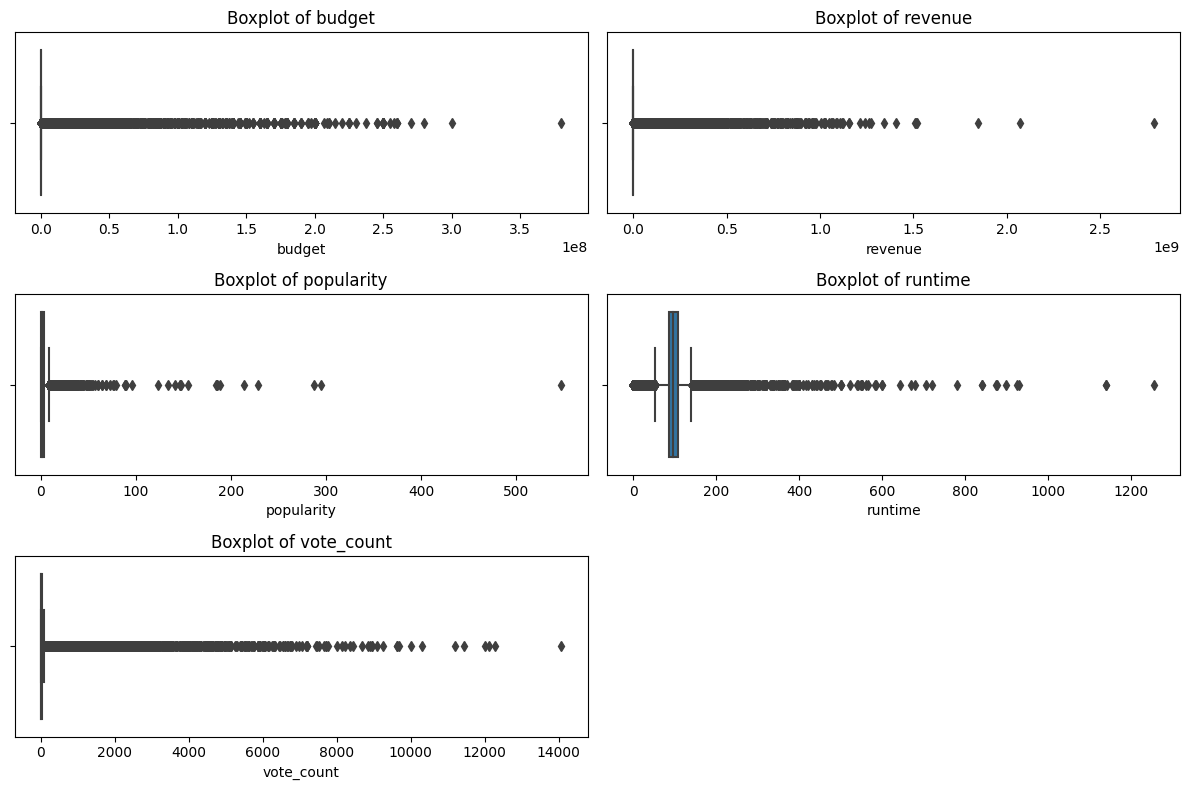

In [29]:
columns = ["budget", "revenue", "popularity", "runtime", "vote_count"]

outliers = {}
for col in columns:
    outliers[col] = detect_outliers_iqr(movies_df, col)


plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=movies_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.savefig("Box_plot.png", dpi=700)
plt.show()

In [30]:
for col in columns:
    print(f"Number of outliers in {col}: {len(outliers[col])}")

Number of outliers in budget: 8893
Number of outliers in revenue: 7414
Number of outliers in popularity: 4237
Number of outliers in runtime: 5417
Number of outliers in vote_count: 6889


In [31]:
movies_df['budget'] = np.log1p(movies_df['budget'])
movies_df['revenue'] = np.log1p(movies_df['revenue'])
movies_df['populairty'] = np.log1p(movies_df['popularity'])

In [32]:
#Chat GPT Code.
#Replace values above the 99th percentile with the 99th percentile value to limit their impact.

popularity_threshold = movies_df['popularity'].quantile(0.99)
movies_df['popularity'] = movies_df['popularity'].apply(lambda x: popularity_threshold if x > popularity_threshold else x)

In [33]:
max_runtime = movies_df['runtime'].quantile(0.99)
movies_df = movies_df[(movies_df['runtime'] >= 30) & (movies_df['runtime'] <= max_runtime)]

In [34]:
movies_df = movies_df[movies_df['vote_count'] >= 5]

movies_df['vote_count'] = np.log1p(movies_df['vote_count']) 

In [35]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,release_year,populairty
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",17.216708,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",17.001435,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,19.738573,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,,Toy Story,False,7.7,8.597113,1995,1995,3.133185
1,False,,17.989898,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.001435,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,19.386893,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,Roll the dice and unleash the excitement!,Jumanji,False,6.9,7.789040,1995,1995,2.891235
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.000000,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,4.532599,1995,1995,2.542617
3,False,,16.588099,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,18.215526,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,3.555348,1995,1995,1.580935
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.000000,"[{'id': 35, 'name': 'Comedy'}]",,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,18.153832,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,5.159055,1995,1995,2.239381


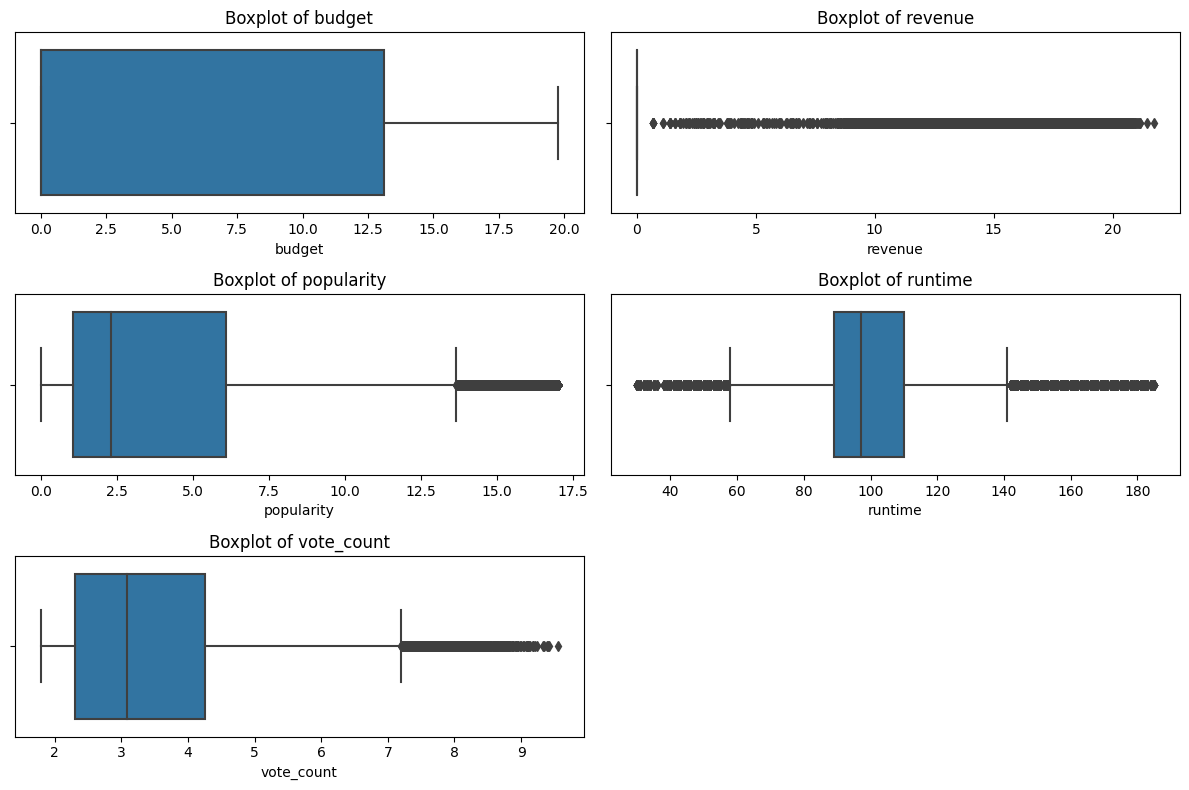

In [36]:
columns = ["budget", "revenue", "popularity", "runtime", "vote_count"]

outliers = {}
for col in columns:
    outliers[col] = detect_outliers_iqr(movies_df, col)


plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=movies_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.savefig("Box_plot_after.png", dpi=700)
plt.show()

In [37]:
movies_df['revenue'].describe()

count    29298.000000
mean         3.892465
std          7.052079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.748578
Name: revenue, dtype: float64

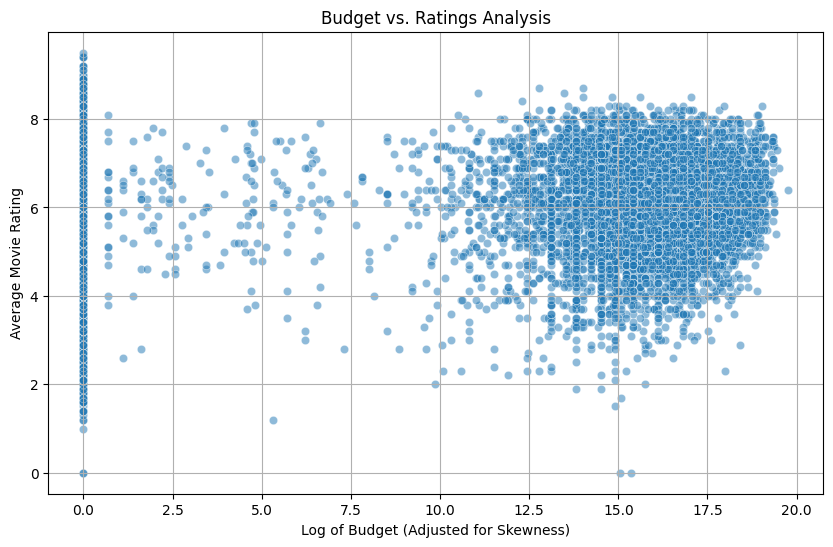

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='budget', y='vote_average', alpha=0.5)
plt.xlabel("Log of Budget (Adjusted for Skewness)")
plt.ylabel("Average Movie Rating")
plt.title("Budget vs. Ratings Analysis")
plt.grid(True)
plt.savefig("scatter_bufgetvsrating",dpi=700)
plt.show()

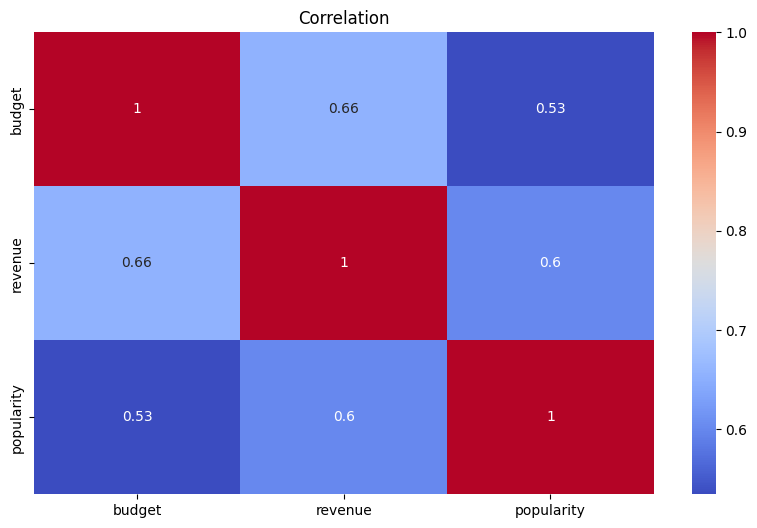

In [39]:
attributes = ['budget', 'revenue', 'popularity']
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df[attributes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [40]:
correlation = movies_df[['budget', 'revenue']].corr()
print(correlation)

           budget   revenue
budget   1.000000  0.656052
revenue  0.656052  1.000000


In [41]:
print(movies_df['genres'].isnull().sum())
col = movies_df['genres']
movies_df['genres'] = movies_df['genres'].apply(eval)
print(col[0])

0
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [42]:
genre_list = []
movies_df['genres']
i = 0
for genres in movies_df['genres']:
    genre_once = []
    for genre in genres:
        genre_once.append(genre['name'])
    genre_list.append(genre_once)
        


In [43]:
all_genres = []
for genre_list in movies_df['genres']:
    for genre in genre_list:
        all_genres.append(genre['name'])
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)

Drama                                    14123
Comedy                                    9311
Thriller                                  6205
Action                                    5241
Romance                                   4815
Horror                                    3906
Crime                                     3313
Adventure                                 2776
Science Fiction                           2449
Family                                    2097
Mystery                                   1903
Fantasy                                   1800
Documentary                               1703
Animation                                 1223
Music                                      992
History                                    966
Foreign                                    934
War                                        898
Western                                    647
TV Movie                                   475
Carousel Productions                         1
Vision View E

In [44]:
available_genres = set()
for genre in all_genres:
   if genre not in available_genres:
        available_genres.add(genre)
available_genres = sorted(list(available_genres))
print(available_genres)

['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee', 'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie', 'Telescene Film Group Productions', 'The Cartel', 'Thriller', 'Vision View Entertainment', 'War', 'Western']


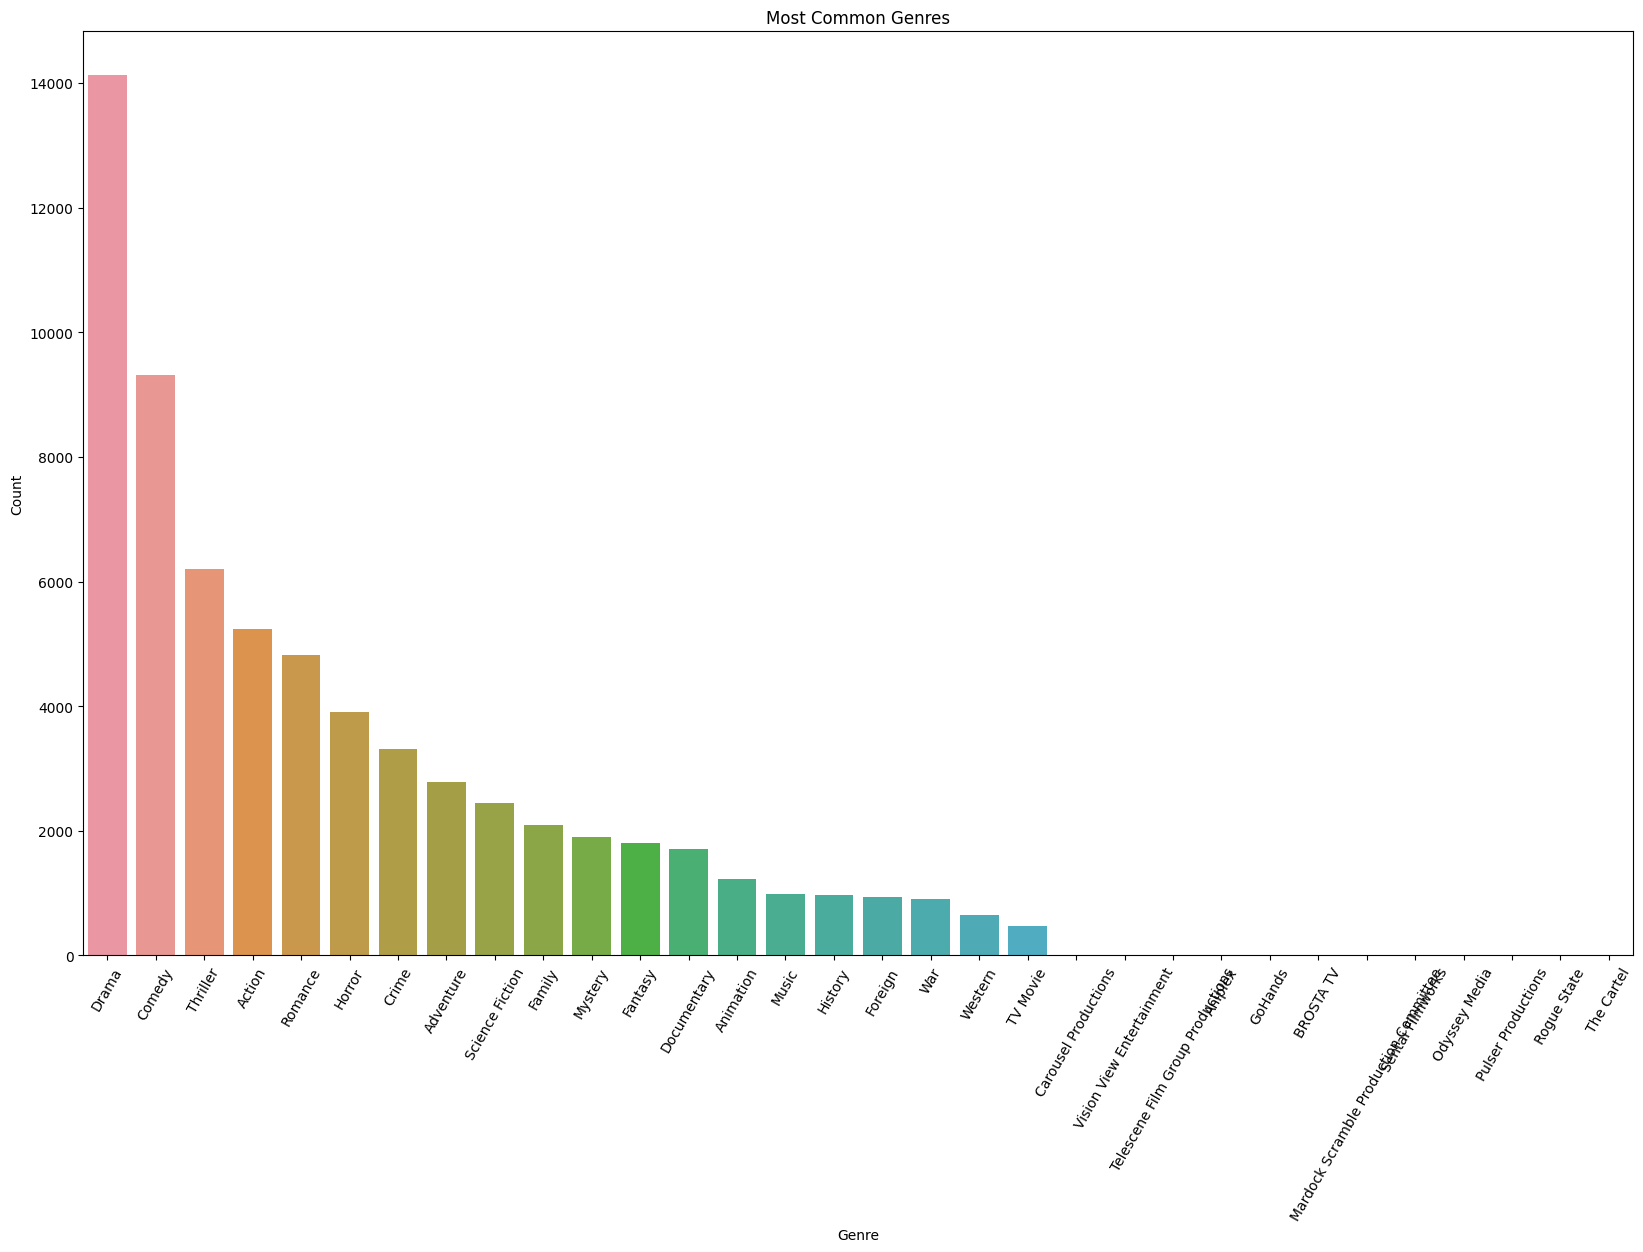

In [45]:
plt.figure(figsize=(20, 12))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=60)
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig("bar graph of most common genres.png", dpi =700)
plt.show()


In [46]:
movies_df['production_comapnies'] = movies_df['production_companies'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Chat GPT Code
movies_df['production_companies'] = movies_df['production_comapnies'].apply(lambda x: [] if isinstance(x, bool) else x)

In [47]:
Production = []
movies_df['production_companies']
for prods in movies_df['production_companies']:
    prod_once = []
    for prod in prods:
        prod_once.append(prod['name'])
    Production.append(prod_once)

all_productions = []
for prods in movies_df['production_companies']:
    for prod in prods:
        all_productions.append(prod['name'])
prod_counts = pd.Series(all_productions).value_counts()
print(prod_counts)



Warner Bros.                              939
Paramount Pictures                        803
Universal Pictures                        753
Twentieth Century Fox Film Corporation    665
Metro-Goldwyn-Mayer (MGM)                 628
                                         ... 
Les Productions FDL                         1
La Station d'Animation                      1
Sathya Movies                               1
Kirk Shaw Productions                       1
Aboretum Productions                        1
Name: count, Length: 19155, dtype: int64


In [48]:
limited_prods = prod_counts[prod_counts.values > 110]

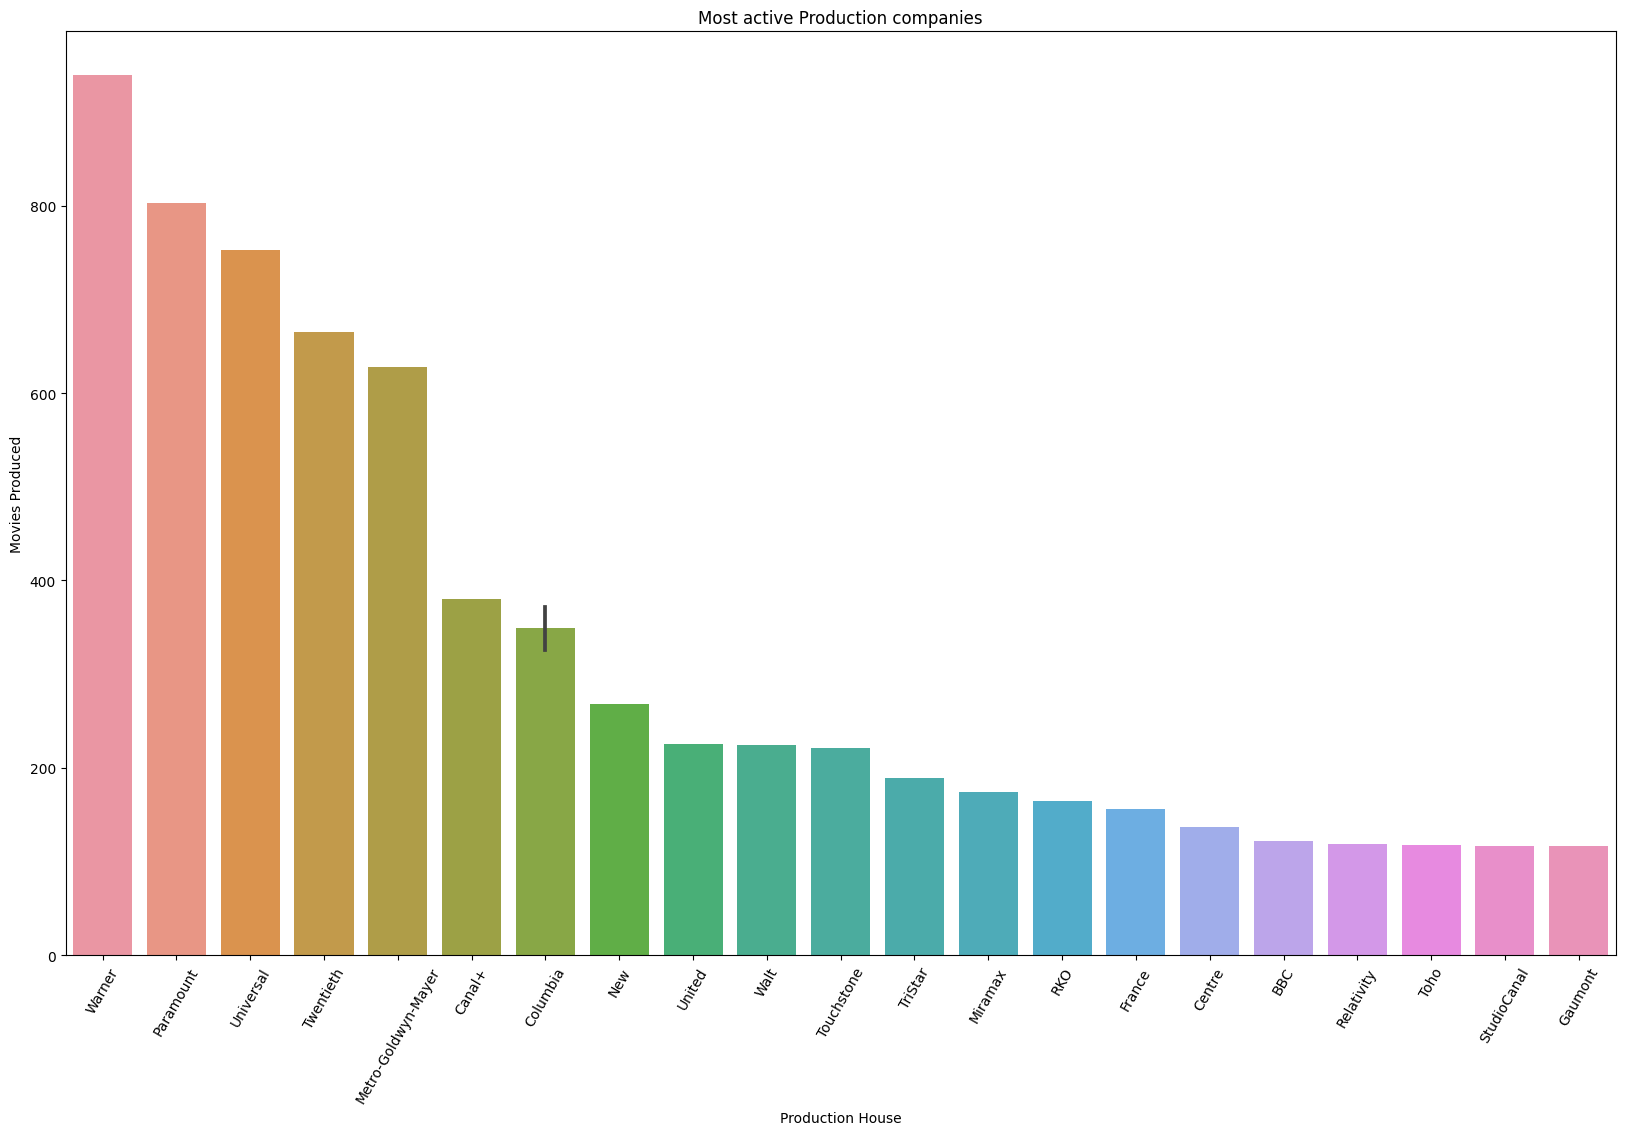

In [49]:
plt.figure(figsize=(20, 12))
sns.barplot(x=limited_prods.index.str.split().str[0], y=limited_prods.values)
plt.xticks(rotation=60)
plt.title("Most active Production companies")
plt.xlabel("Production House")
plt.ylabel("Movies Produced")
plt.savefig("Production_activity.png", dpi=700)
plt.show()


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
movies_df['normalized_budget'] = scaler.fit_transform(movies_df[['budget']])

In [51]:
movies_df['normalized_revenue'] = scaler.fit_transform(movies_df[['revenue']])

In [52]:
movies_df['normalized_popularity'] = scaler.fit_transform(movies_df[['popularity']])

In [53]:
movies_df['normalized_runtime'] = scaler.fit_transform(movies_df[['runtime']])

In [54]:
movies_df['normalized_vote_average'] = scaler.fit_transform(movies_df[['vote_average']])

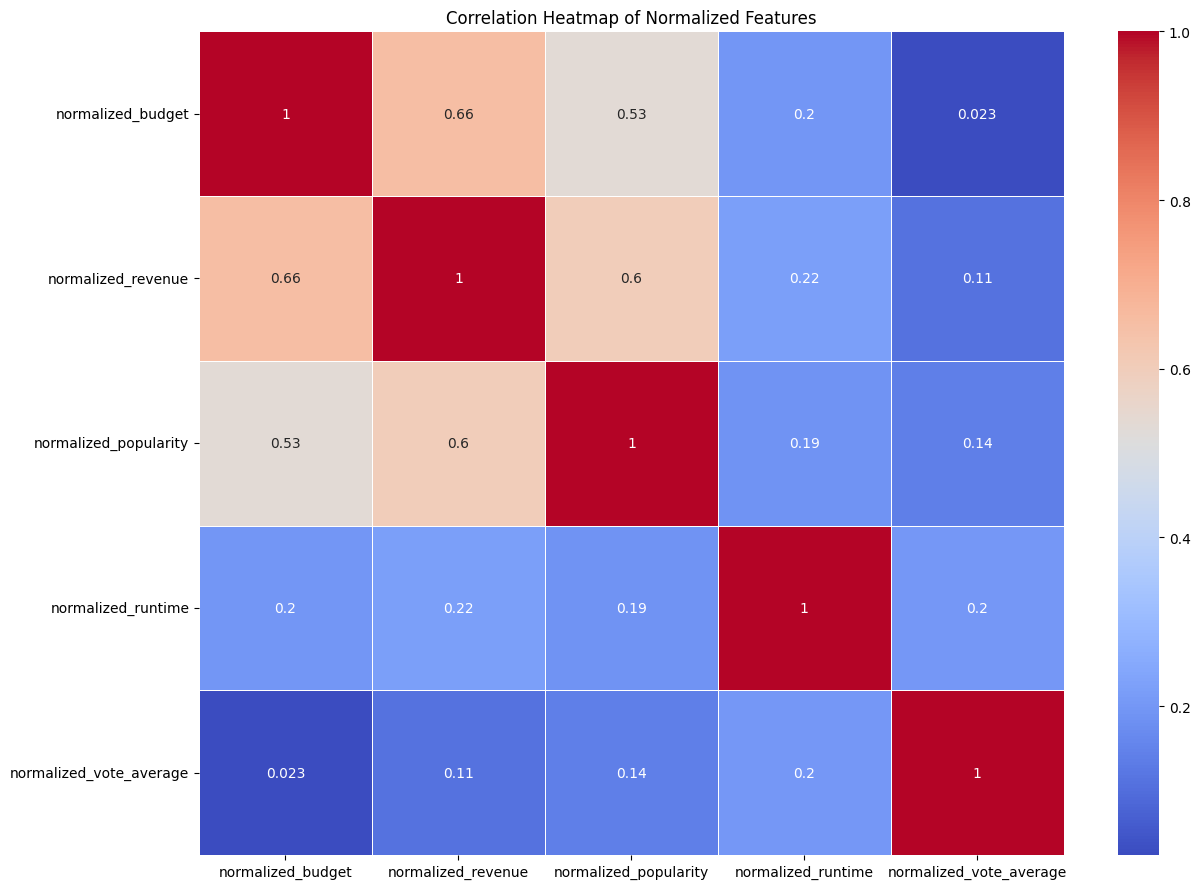

In [55]:
corr_matrix = movies_df[['normalized_budget', 'normalized_revenue', 'normalized_popularity', 
                         'normalized_runtime', 'normalized_vote_average']].corr()


plt.figure(figsize=(13, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Normalized Features')
plt.savefig("Correlatrion.png", dpi =700)
plt.tight_layout()
plt.show()

In [56]:
underrated_movies = movies_df[(movies_df['normalized_vote_average'] > 0.7) & (movies_df['normalized_popularity'] < 0.3)]


print(underrated_movies[['title', 'vote_average', 'popularity']].head(5))

                       title  vote_average  popularity
25                   Othello           7.0    1.845899
27                Persuasion           7.4    2.228434
39  Cry, the Beloved Country           6.7    0.894647
40               Richard III           6.9    4.561387
52                  Lamerica           7.7    1.361286


In [57]:
ratings_df = pd.read_csv("/kaggle/input/the-movies-dataset/ratings.csv")

In [58]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [59]:
links = pd.read_csv("/kaggle/input/the-movies-dataset/links.csv")

In [60]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [61]:
missing_values = ratings_df.isnull().sum()
print(missing_values)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [62]:
missing = links.isnull().sum()
print(missing)

movieId      0
imdbId       0
tmdbId     219
dtype: int64


In [63]:
#chatgpt Code - used to find the avg rating given by users to a Movie along with the number of reviews
# Removes the prefix from imdb_id in the movies_metadeta dataset
ratings_summary = ratings_df.groupby("movieId")["rating"].agg(avg_rating="mean", num_reviews="count").reset_index()
movies_df["imdb_id"] = movies_df["imdb_id"].astype(str).str.replace("tt", "", regex=False)
movies_df["imdb_id"] = pd.to_numeric(movies_df["imdb_id"], errors="coerce")
ratings_summary

,movieId,avg_rating,num_reviews
0,1,3.888157,66008
1,2,3.236953,26060
2,3,3.175550,15497
3,4,2.875713,2981
4,5,3.079565,15258
...,...,...,...
45110,176267,4.000000,1
45111,176269,3.500000,1
45112,176271,5.000000,1
45113,176273,1.000000,1


In [64]:
links["imdbId"] = pd.to_numeric(links["imdbId"], errors="coerce")


In [65]:
movies = links.merge(movies_df, left_on="imdbId", right_on="imdb_id", how="left")[["movieId", "title"]]
movies_final = ratings_summary.merge(movies, on="movieId", how="left")
movies_final.head()

,movieId,avg_rating,num_reviews,title
0,1,3.888157,66008,Toy Story
1,2,3.236953,26060,Jumanji
2,3,3.175550,15497,Grumpier Old Men
3,4,2.875713,2981,Waiting to Exhale
4,5,3.079565,15258,Father of the Bride Part II


In [66]:
ott_df = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv')
ott_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [67]:
service_counts = {
    'Netflix': ott_df['Netflix'].sum(),
    'Prime Video': ott_df['Prime Video'].sum(),
    'Hulu': ott_df['Hulu'].sum(),
    'Disney+': ott_df['Disney+'].sum(),
}


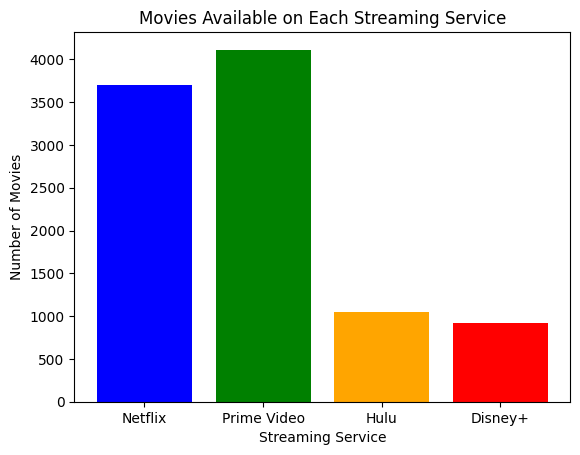

In [68]:
plt.bar(service_counts.keys(), service_counts.values(), color=['blue', 'green', 'orange', 'red'])


plt.xlabel('Streaming Service')
plt.ylabel('Number of Movies')
plt.title('Movies Available on Each Streaming Service')
plt.savefig("Movies_streaming.png", dpi =700)
plt.show()

In [69]:
top_grosser = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv")
top_grosser.head()

,Movie Title,Year of Realease,Genre,Movie Rating,Duration,Gross,Worldwide LT Gross,Metascore,Votes,Logline
0,Avatar,2009,"Action,Adventure,Fantasy",7.8,162,$760.51M,"$2,847,397,339",83,"1,236,962",A paraplegic Marine dispatched to the moon Pan...
1,Avengers: Endgame,2019,"Action,Adventure,Drama",8.4,181,$858.37M,"$2,797,501,328",78,"1,108,641",After the devastating events of Avengers: Infi...
2,Titanic,1997,"Drama,Romance",7.9,194,$659.33M,"$2,201,647,264",75,"1,162,142",A seventeen-year-old aristocrat falls in love ...
3,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Sci-Fi",7.8,138,$936.66M,"$2,069,521,700",80,"925,551","As a new threat to the galaxy rises, Rey, a de..."
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.4,149,$678.82M,"$2,048,359,754",68,"1,062,517",The Avengers and their allies must be willing ...


In [70]:
top_grosser.rename(columns={'Year of Realease': 'Year'}, inplace=True)

In [71]:
top_grosser['Year'] = top_grosser['Year'].astype(str).str.extract('(\d+)').astype(int)

top_grosser['Worldwide LT Gross'] = top_grosser['Worldwide LT Gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

highest_grossing = top_grosser.loc[top_grosser.groupby('Year')['Worldwide LT Gross'].idxmax()]

highest_grossing_movies = highest_grossing[['Year', 'Movie Title', 'Worldwide LT Gross', 'Genre']]

highest_grossing_movies = highest_grossing_movies.sort_values(by='Year')
highest_grossing_movies

,Year,Movie Title,Worldwide LT Gross,Genre
936,1937,Snow White and the Seven Dwarfs,1.849255e+08,"Animation,Adventure,Family"
325,1939,Gone with the Wind,4.023822e+08,"Drama,Romance,War"
593,1942,Bambi,2.674472e+08,"Animation,Adventure,Drama"
779,1961,One Hundred and One Dalmatians,2.158800e+08,"Animation,Adventure,Comedy"
831,1967,The Jungle Book,2.058436e+08,"Animation,Adventure,Comedy"
646,1972,The Godfather,2.503418e+08,"Crime,Drama"
281,1973,The Exorcist,4.413061e+08,Horror
248,1975,Jaws,4.741413e+08,"Adventure,Thriller"
105,1977,Star Wars,7.753980e+08,"Action,Adventure,Fantasy"
334,1978,Grease,3.962711e+08,"Comedy,Musical,Romance"


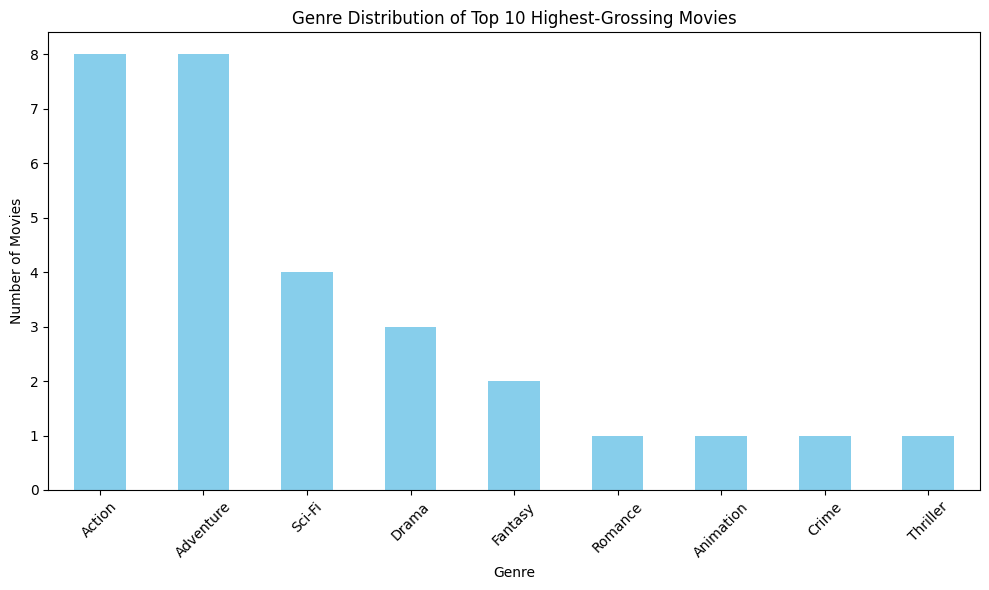

In [72]:
top_grosser_sorted = top_grosser.sort_values(by="Worldwide LT Gross", ascending=False)


top_10_movies = top_grosser_sorted.head(10)


genres = top_10_movies['Genre'].str.split(",", expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='skyblue')
plt.title("Genre Distribution of Top 10 Highest-Grossing Movies")
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("genre_revenue", dpi=700)
plt.show()

In [73]:
credits_df = pd.read_csv("/kaggle/input/the-movies-dataset/credits.csv", low_memory=False)

In [74]:
credits_df.head(5)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [75]:
credits_df["id"] = pd.to_numeric(credits_df["id"], errors="coerce")


In [76]:
import ast

def get_director(crew):
    crew_list = ast.literal_eval(crew)  
    for member in crew_list:
        if member.get("job") == "Director":
            return member.get("name")
   

def get_lead_actor(cast):
    cast_list = ast.literal_eval(cast)  
    if cast_list:
        return cast_list[0].get("name")  


In [77]:
credits_df["director"] = credits_df["crew"].apply(get_director)
credits_df["lead_actor"] = credits_df["cast"].apply(get_lead_actor)

In [78]:
credits_df.head()

,cast,crew,id,director,lead_actor
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,Tom Hanks
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,Robin Williams
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,Walter Matthau
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,Whitney Houston
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,Steve Martin


In [79]:
movies_df["id"] = pd.to_numeric(movies_df["id"], errors="coerce")
movies_df = movies_df.dropna(subset=["id"])
credits_df = credits_df.dropna(subset=["id"])
movies_df["id"] = movies_df["id"].astype(int)

In [80]:
final_df_unmnodified = credits_df.merge(movies_df, on="id", how="left")

In [81]:
final_df_unmnodified.head()

,cast,crew,id,director,lead_actor,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,release_year,populairty,production_comapnies,normalized_budget,normalized_revenue,normalized_popularity,normalized_runtime,normalized_vote_average
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,Tom Hanks,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",17.216708,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,114709.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",17.001435,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,19.738573,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,,Toy Story,False,7.7,8.597113,1995.0,1995.0,3.133185,"[{'name': 'Pixar Animation Studios', 'id': 3}]",0.871481,0.907580,1.000000,0.329032,0.810526
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,Robin Williams,False,,17.989898,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",,113497.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.001435,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,19.386893,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,Roll the dice and unleash the excitement!,Jumanji,False,6.9,7.789040,1995.0,1995.0,2.891235,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",0.910619,0.891410,1.000000,0.477419,0.726316
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,Walter Matthau,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,113228.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.000000,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,4.532599,1995.0,1995.0,2.542617,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",0.000000,0.000000,0.688936,0.458065,0.684211
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,Whitney Houston,False,,16.588099,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,114885.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,18.215526,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,3.555348,1995.0,1995.0,1.580935,[{'name': 'Twentieth Century Fox Film Corporat...,0.839662,0.837550,0.227010,0.625806,0.642105
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,Steve Martin,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.000000,"[{'id': 35, 'name': 'Comedy'}]",,113041.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,18.153832,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,

In [82]:
final_df = final_df_unmnodified[['id','title', 'budget','revenue','runtime','production_comapnies','year','imdb_id', 'original_language','genres','lead_actor','director', 'popularity', 'vote_average', 'overview']]

In [83]:
final_df.head()

,id,title,budget,revenue,runtime,production_comapnies,year,imdb_id,original_language,genres,lead_actor,director,popularity,vote_average,overview
0,862,Toy Story,17.216708,19.738573,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995.0,114709.0,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Tom Hanks,John Lasseter,17.001435,7.7,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,17.989898,19.386893,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995.0,113497.0,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Robin Williams,Joe Johnston,17.001435,6.9,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,0.000000,0.000000,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995.0,113228.0,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Walter Matthau,Howard Deutch,11.712900,6.5,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,16.588099,18.215526,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,1995.0,114885.0,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Whitney Houston,Forest Whitaker,3.859495,6.1,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,0.000000,18.153832,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995.0,113041.0,en,"[{'id': 35, 'name': 'Comedy'}]",Steve Martin,Charles Shyer,8.387519,5.7,Just when George Banks has recovered from his ...


In [84]:
final_df = final_df.copy()
final_df['title'] = final_df['title'].str.lower().str.strip()
ott_df['Title']   = ott_df['Title'].str.lower().str.strip()

In [85]:
ott_df.rename(columns={'Title': 'title'}, inplace=True)

final_df = final_df.merge(
    ott_df[['title', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']],
    on='title',
    how='left'
)

In [86]:
final_df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']] = (
    final_df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]
    .fillna(0)
)

final_df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']] = (
    final_df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]
    .astype(int)
)

In [87]:
final_df.head()

,id,title,budget,revenue,runtime,production_comapnies,year,imdb_id,original_language,genres,lead_actor,director,popularity,vote_average,overview,Netflix,Hulu,Prime Video,Disney+
0,862,toy story,17.216708,19.738573,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995.0,114709.0,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Tom Hanks,John Lasseter,17.001435,7.7,"Led by Woody, Andy's toys live happily in his ...",0,0,0,1
1,8844,jumanji,17.989898,19.386893,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995.0,113497.0,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Robin Williams,Joe Johnston,17.001435,6.9,When siblings Judy and Peter discover an encha...,0,0,0,0
2,15602,grumpier old men,0.000000,0.000000,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995.0,113228.0,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Walter Matthau,Howard Deutch,11.712900,6.5,A family wedding reignites the ancient feud be...,0,0,0,0
3,31357,waiting to exhale,16.588099,18.215526,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,1995.0,114885.0,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Whitney Houston,Forest Whitaker,3.859495,6.1,"Cheated on, mistreated and stepped on, the wom...",0,0,0,0
4,11862,father of the bride part ii,0.000000,18.153832,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995.0,113041.0,en,"[{'id': 35, 'name': 'Comedy'}]",Steve Martin,Charles Shyer,8.387519,5.7,Just when George Banks has recovered from his ...,0,0,0,0


In [88]:
final_df.to_csv('Preprocessed_data', index=False)

# The following section of Code deals with Feature Engineering, Feature selection and Model training.(Milestone 2)

In [89]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import fasttext


In [90]:
df = pd.read_csv("/kaggle/working/Preprocessed_data").copy()

### Preprocessing of the Text Based features, the parse_genres functions converts the Genre column of the dataframe to a list containing genres

In [91]:

import ast

def parse_genres(genre_str):
    if pd.isnull(genre_str):
        return []
    try:
        
        data = ast.literal_eval(genre_str)
        
        return [d.get('name', '').strip() for d in data if 'name' in d]
    except (SyntaxError, ValueError):
        
        return []

df['genre_list'] = df['genres'].apply(parse_genres)

In [92]:
#Same function to parse the genres is used to parse the production companies
df['production_list'] = df['production_comapnies'].apply(parse_genres)

## Feature Enginnering

In [93]:
#Three new Features engineered
#Budget_popularity
#OTT Score
#Movie Age

df['budget_popularity'] = df['budget'] * df['popularity']

df['ott_score'] = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

current_year = pd.Timestamp.now().year
df['movie_age'] = current_year - df['year']
df['movie_age'] = df['movie_age'].astype(float)

df['title'] = df['title'].str.lower().str.strip()

### Drawing insights from the "Director" attribute of the Dataset

In [94]:

director_genre_count = {}


for _, row in df.iterrows():
    director = row['director']
    genres = row['genre_list']
    
   
    if director not in director_genre_count:
        director_genre_count[director] = {}
    
    for genre in genres:
        if genre not in director_genre_count[director]:
            director_genre_count[director][genre] = 1
        else:
            director_genre_count[director][genre] += 1

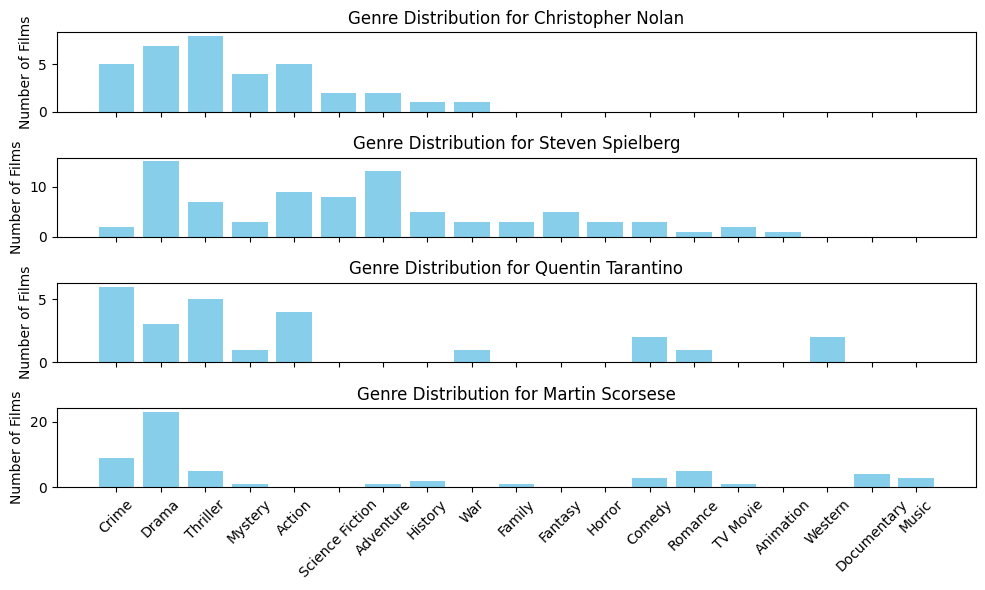

In [95]:
def visualize_director_genre_count(director_genre_dict, directors):
   
    selected_data = {director: director_genre_dict.get(director, {}) for director in directors}
    
    fig, axes = plt.subplots(len(directors), 1, figsize=(10, 6), sharex=True)
    if len(directors) == 1:
        axes = [axes]  
    
    for i, director in enumerate(directors):
        genres = list(selected_data[director].keys())
        counts = list(selected_data[director].values())
        
        axes[i].bar(genres, counts, color='skyblue')
        axes[i].set_title(f"Genre Distribution for {director}")
        axes[i].set_ylabel("Number of Films")
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig("Director_Genre", dpi=700)
    plt.show()


directors_to_plot = ['Christopher Nolan', 'Steven Spielberg', 'Quentin Tarantino', 'Martin Scorsese']
visualize_director_genre_count(director_genre_count, directors_to_plot)

In [96]:
df.head()

,id,title,budget,revenue,runtime,production_comapnies,year,imdb_id,original_language,genres,lead_actor,director,popularity,vote_average,overview,Netflix,Hulu,Prime Video,Disney+,genre_list,production_list,budget_popularity,ott_score,movie_age
0,862,toy story,17.216708,19.738573,81.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995.0,114709.0,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Tom Hanks,John Lasseter,17.001435,7.7,"Led by Woody, Andy's toys live happily in his ...",0,0,0,1,"[Animation, Comedy, Family]",[Pixar Animation Studios],292.708747,1,30.0
1,8844,jumanji,17.989898,19.386893,104.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995.0,113497.0,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Robin Williams,Joe Johnston,17.001435,6.9,When siblings Judy and Peter discover an encha...,0,0,0,0,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",305.854084,0,30.0
2,15602,grumpier old men,0.000000,0.000000,101.0,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995.0,113228.0,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Walter Matthau,Howard Deutch,11.712900,6.5,A family wedding reignites the ancient feud be...,0,0,0,0,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",0.000000,0,30.0
3,31357,waiting to exhale,16.588099,18.215526,127.0,[{'name': 'Twentieth Century Fox Film Corporat...,1995.0,114885.0,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Whitney Houston,Forest Whitaker,3.859495,6.1,"Cheated on, mistreated and stepped on, the wom...",0,0,0,0,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],64.021686,0,30.0
4,11862,father of the bride part ii,0.000000,18.153832,106.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995.0,113041.0,en,"[{'id': 35, 'name': 'Comedy'}]",Steve Martin,Charles Shyer,8.387519,5.7,Just when George Banks has recovered from his ...,0,0,0,0,[Comedy],"[Sandollar Productions, Touchstone Pictures]",0.000000,0,30.0


In [97]:
df.to_csv('Data_milestone2', index=False)

## Tokenizing Text Based Features

In [98]:
def tokenize_features(row):
    tokens = []
    overview = row.get('overview', '')
    if isinstance(overview, str):
        tokens.extend(overview.split()) 
        
    for feature in ['director', 'lead_actor', 'original_language', 'genre_list', 'production_list']:
        val = row.get(feature, '')
        if isinstance(val, str):
            try:
                parsed = ast.literal_eval(val)
                if isinstance(parsed, list):
                    temp_list = []
                    for item in parsed:
                        temp_list.append(str(item))
                    tokens.extend(temp_list)
                else:
                    tokens.append(str(parsed))
            except:
                tokens.append(val)
        else:
            tokens.append(str(val))
    return tokens


In [99]:
df['tokens'] = df.apply(tokenize_features, axis=1)

In [100]:
import tempfile

## FastText Based Model

In [101]:
with tempfile.NamedTemporaryFile(mode="w+", delete=False) as temp_file:
    for tokens in df['tokens']:
        temp_file.write(" ".join(tokens) + "\n")
    training_file = temp_file.name

ft_model = fasttext.train_unsupervised(input=training_file, model='skipgram', dim=100, epoch=5)

In [102]:
def get_average_vector(tokens, model):
    # Even if a token is unseen, fastText returns a vector.
    if not tokens:
        return np.zeros(model.get_dimension())
    vectors = [model.get_word_vector(token) for token in tokens]
    return np.mean(vectors, axis=0)

df['ft_vector'] = df['tokens'].apply(lambda tokens: get_average_vector(tokens, ft_model))

In [103]:
num_features = [
    'budget_popularity',
    'revenue',
    'runtime',
    'ott_score',
    'vote_average',
    'movie_age'
]

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [105]:
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features].fillna(0))

def combine_features(row):
   
    text_vector = row['ft_vector']
   
    numerical_vector = row[num_features].values.astype(float)
   
    return np.concatenate((text_vector, numerical_vector))

df['combined_vector'] = df.apply(combine_features, axis=1)
combined_matrix = np.vstack(df['combined_vector'])


row_norms = np.linalg.norm(combined_matrix, axis=1)


df = df.reset_index(drop=True)
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [106]:
def get_recommendations(title, top_n=10):
    
    if title not in indices:
        raise ValueError(f"Movie '{title}' not found in the dataset.")
    
    idx = indices[title]
    target_vec = combined_matrix[idx]
    target_norm = row_norms[idx]
    
   
    dot_products = combined_matrix.dot(target_vec)
    cosine_similarities = dot_products / (row_norms * target_norm + 1e-10)
    
    
    cosine_similarities[idx] = -np.inf
    recommended_indices = np.argsort(cosine_similarities)[::-1][:top_n]
    return df['title'].iloc[recommended_indices].tolist()

### Recommendations by the FastText embeddings based Model

In [107]:
movie_to_search = "interstellar"
try:
    recommendations = get_recommendations(movie_to_search, top_n=10)
    print(f"Recommendations for '{movie_to_search}':")
    for rec in recommendations:
        print(rec)
except Exception as e:
    print(e)

Recommendations for 'interstellar':
fantastic beasts and where to find them
transformers: age of extinction
the hobbit: the battle of the five armies
tomorrowland
maze runner: the scorch trials
valerian and the city of a thousand planets
apollo 13
pacific rim
transformers: the last knight
dawn of the planet of the apes


### Visualizing the Principle components of the Movie embeddings vector

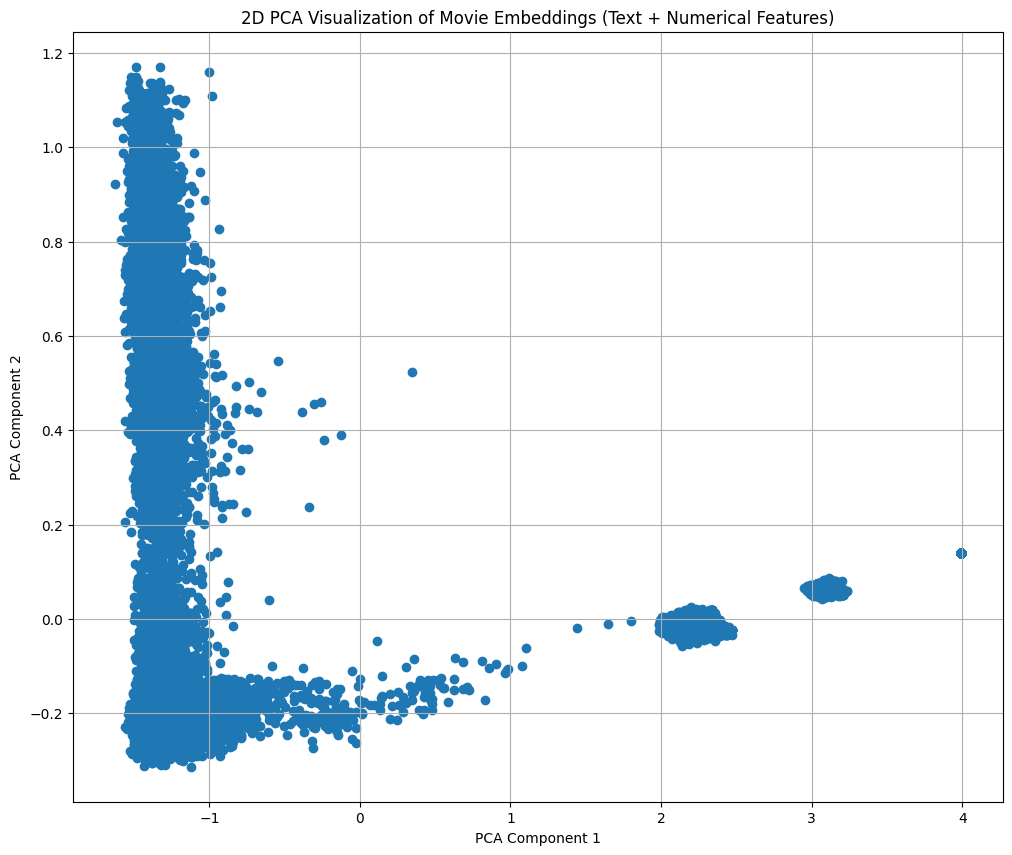

In [108]:
movie_vectors = np.vstack(df['combined_vector'].values)

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(movie_vectors)

plt.figure(figsize=(12, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

plt.title("2D PCA Visualization of Movie Embeddings (Text + Numerical Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.savefig("Embedded space", dpi=700)
plt.show()

In [109]:
df['document'] = df['tokens'].apply(lambda tokens: " ".join(tokens))

## Clustering Based Models

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

### Vectorizing the text-based attributes using  TFIDF Vectorizer

### Further reducing the dimensionality of the TFIDF vectors using SVD

In [111]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['document'])

In [112]:
n_components = 100  
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)

### Imparting a manual bias towards Numerical Attributes

In [113]:
bias_dict = {
    'budget_popularity': 1.0,
    'revenue': 1.0,
    'runtime': 1.2,
    'ott_score': 2.0,
    'movie_age': 1.5,
    'vote_average': 1.0
}


In [114]:
numerical_data = df[num_features].fillna(0)
scaler = MinMaxScaler()
features = scaler.fit_transform(numerical_data) 
numerical_features = np.zeros(features.shape)
for i, feat in enumerate(num_features):
    numerical_features[:, i] = features[:, i] * bias_dict[feat]


In [115]:
print("SVD matrix shape:", svd_matrix.shape)
print("Numerical features shape:", numerical_features.shape)

SVD matrix shape: (45514, 100)
Numerical features shape: (45514, 6)


### Visualizing the TFIDF Vector components (After reducing dimentionality through PCA)

In [116]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

In [117]:
pca_3d = PCA(n_components=3, random_state=42)
X_3d = pca_3d.fit_transform(svd_matrix)
labels = None

<ipython-input-118-dfecdb7a4f57>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis', s=50)


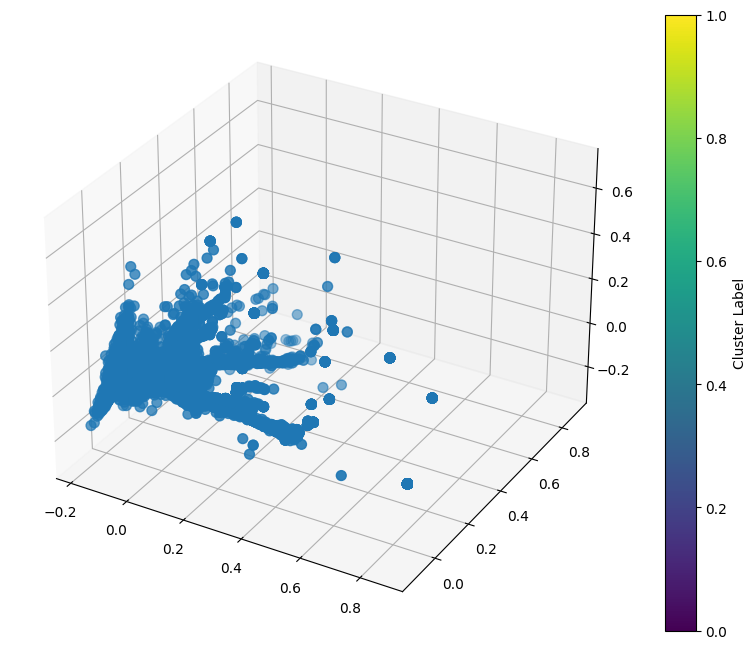

In [118]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
plt.savefig("3d_scatter.png", dpi=700)

# K-Means Clustering

### Finding the optimal number of Clusters through Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

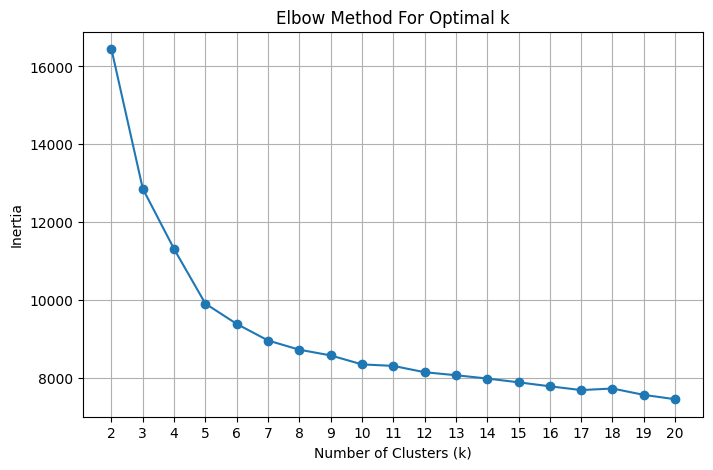

In [119]:
combined_features = np.hstack([svd_matrix, numerical_features])
inertia = []
cluster_range = range(2, 21)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve.
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig("elbow_p.png",dpi=700)
plt.show()


In [120]:
num_clusters = 10 
kmeans = KMeans(n_clusters=num_clusters, random_state=18)
df['cluster'] = kmeans.fit_predict(combined_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualizing the K-Means clusters across two components of the SVD vector

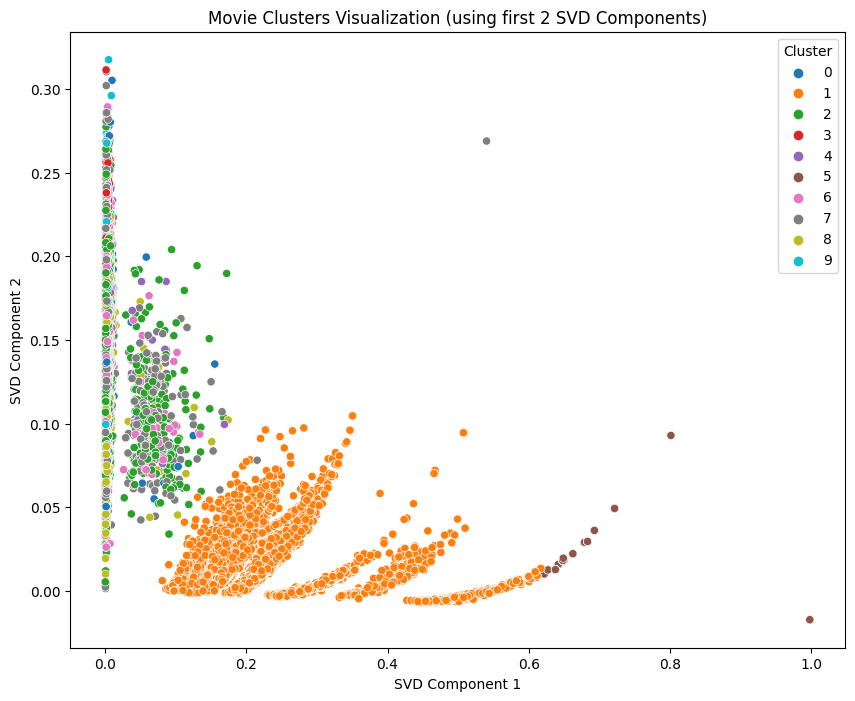

In [121]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=svd_matrix[:, 0], y=svd_matrix[:, 1],
                hue=df['cluster'],
                palette='tab10',
                legend='full')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Movie Clusters Visualization (using first 2 SVD Components)')
plt.savefig("svd two component", dpi =700)
plt.legend(title='Cluster')
plt.show()

## K-Means Recommendations

In [122]:
def recommend_movies(movie_title, df=df, combined_features=combined_features, top_n=10):
    matched = df[df['title'].str.lower() == movie_title.lower()]
    if matched.empty:
        return f"Movie titled '{movie_title}' not found."
    
    cluster_label = matched.iloc[0]['cluster']
    
    similar_movies = df[(df['cluster'] == cluster_label) & (df['title'].str.lower() != movie_title.lower())]
    
    idx = matched.index[0]
    cluster_indices = similar_movies.index
    cos_sim = cosine_similarity(combined_features[idx].reshape(1, -1), combined_features[cluster_indices]).flatten()
    similar_movies = similar_movies.copy()
    similar_movies['similarity'] = cos_sim
    similar_movies = similar_movies.sort_values(by='similarity', ascending=False)
    
    return similar_movies[['title', 'director', 'genre_list', 'similarity']].head(top_n)



In [123]:
print(recommend_movies("toy story", top_n=10))

                    title        director  \
2999          toy story 2   John Lasseter   
3631          chicken run       Nick Park   
4181                shrek  Andrew Adamson   
15367         toy story 3     Lee Unkrich   
1156   the princess bride      Rob Reiner   
11582         ratatouille     Jan Pinkava   
12664       kung fu panda    Mark Osborne   
3131           sister act  Emile Ardolino   
19747      wreck-it ralph      Rich Moore   
6240         finding nemo  Andrew Stanton   

                                            genre_list  similarity  
2999                       [Animation, Comedy, Family]    0.997228  
3631                       [Animation, Comedy, Family]    0.982465  
4181   [Adventure, Animation, Comedy, Family, Fantasy]    0.981135  
15367                      [Animation, Family, Comedy]    0.979779  
1156     [Adventure, Family, Fantasy, Comedy, Romance]    0.978279  
11582             [Animation, Comedy, Family, Fantasy]    0.977740  
12664           [Adve

### K-Means Clustering Evaluation

In [124]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances

In [125]:
kmeans_labels = df['cluster'] 
kmeans_silhouette = silhouette_score(combined_features, kmeans_labels, metric='cosine')
kmeans_davies_bouldin = davies_bouldin_score(combined_features, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(combined_features, kmeans_labels)

In [126]:
print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index: {kmeans_davies_bouldin:.3f}")
print(f"KMeans Calinski-Harabasz Index: {kmeans_calinski_harabasz:.3f}")

KMeans Silhouette Score: 0.041
KMeans Davies-Bouldin Index: 1.888
KMeans Calinski-Harabasz Index: 12472.554


# DBSCAN Clustering

In [127]:
from sklearn.cluster import DBSCAN

In [128]:
df = df.reset_index(drop=True)
title_to_index = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

In [129]:
dbscan_clusterer = DBSCAN(eps=0.2, min_samples=16, metric='cosine')
df['dbscan_cluster'] = dbscan_clusterer.fit_predict(combined_features)

### Visualizing DBSCAN Clusters across two SVD components

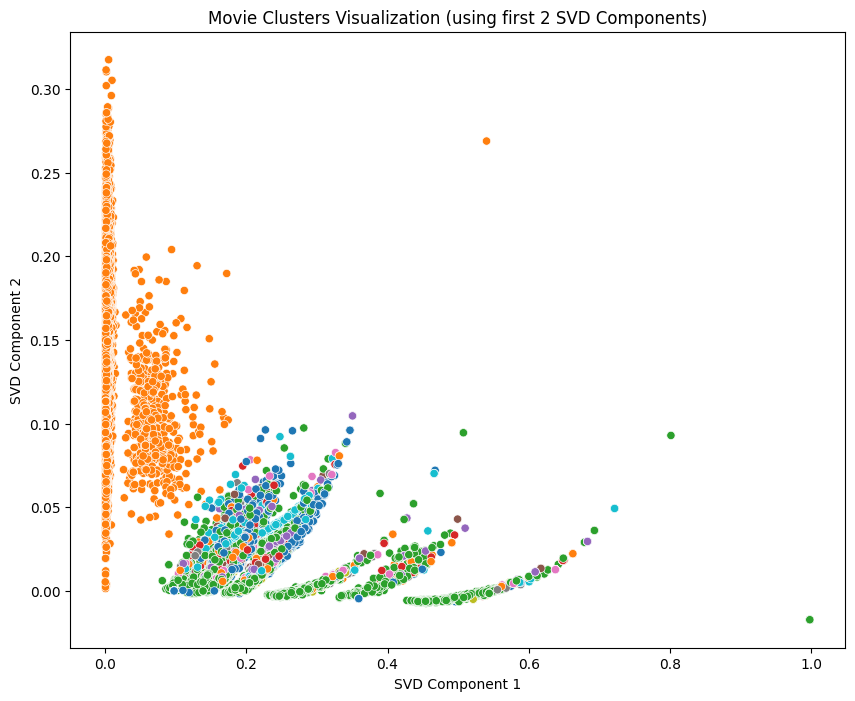

In [130]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=svd_matrix[:, 0], y=svd_matrix[:, 1],
                hue=df['dbscan_cluster'],
                palette='tab10',
                legend=False
                )
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Movie Clusters Visualization (using first 2 SVD Components)')
plt.savefig("svd two component dbscan", dpi =700)

plt.show()

## DBSCAN Recommendations 

In [131]:
def get_recommendations_dbscan(movie_title, top_n=10):
    movie_title_lower = movie_title.lower()
    if movie_title_lower not in title_to_index:
        raise ValueError(f"Movie '{movie_title}' not found.")
    idx = title_to_index[movie_title_lower]
    target_cluster = df.loc[idx, 'dbscan_cluster']
    # If DBSCAN labels noise as -1, handle it.
    if target_cluster == -1:
        return f"Movie '{movie_title}' is labeled as noise by DBSCAN."
    cluster_movies = df[df['dbscan_cluster'] == target_cluster]
    
    target_vec = combined_features[idx].reshape(1, -1)
    cluster_indices = cluster_movies.index
    cos_sim = cosine_similarity(target_vec, combined_features[cluster_indices]).flatten()
    
    cluster_movies = cluster_movies.copy()
    cluster_movies['similarity'] = cos_sim
    cluster_movies = cluster_movies.drop(idx)
    recommendations = cluster_movies.sort_values(by='similarity', ascending=False)['title'].head(top_n).tolist()
    return recommendations

In [132]:
movie_query = "toy story"
recs_dbscan = get_recommendations_dbscan(movie_query, top_n=10)
print(recs_dbscan)  

['toy story 2', 'chicken run', 'shrek', 'toy story 3', 'the princess bride', 'ratatouille', 'kung fu panda', 'sister act', 'wreck-it ralph', 'finding nemo']


In [133]:
dbscan_labels = df['dbscan_cluster'] 

In [134]:
unique_clusters = np.unique(dbscan_labels)
print(f"Unique DBSCAN clusters: {unique_clusters}")

Unique DBSCAN clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51]


### DBSCAN Clustering Evaluation

In [135]:
dbscan_silhouette = silhouette_score(combined_features, dbscan_labels, metric='cosine')
dbscan_davies_bouldin = davies_bouldin_score(combined_features, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(combined_features, dbscan_labels)

In [136]:
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin:.3f}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_calinski_harabasz:.3f}")

DBSCAN Silhouette Score: 0.672
DBSCAN Davies-Bouldin Index: 1.638
DBSCAN Calinski-Harabasz Index: 858.251


# Gaussian Mixture Model 

In [138]:
from sklearn.mixture import GaussianMixture
num_components = 10
gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm_labels = gmm.fit_predict(combined_features)
df['gmm_cluster'] = gmm_labels

### Visualizing the GMM Clusters across two components of SVD vector

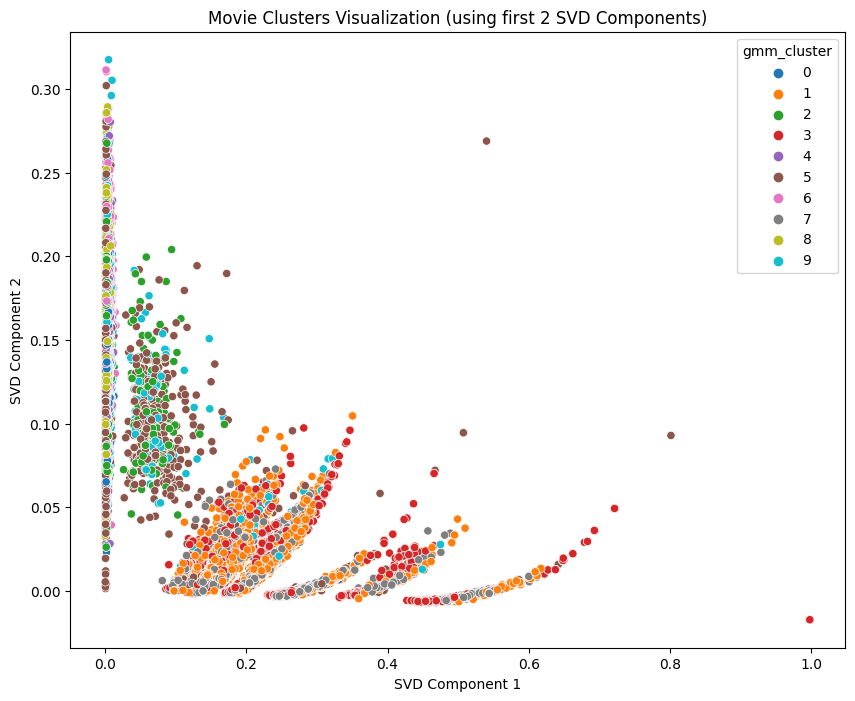

In [139]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=svd_matrix[:, 0], y=svd_matrix[:, 1],
                hue=df['gmm_cluster'],
                palette='tab10'
                )
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Movie Clusters Visualization (using first 2 SVD Components)')
plt.savefig("svd two component gmm", dpi =700)

plt.show()

## GMM Movie Recommendations

In [140]:
def get_recommendations_gmm(movie_title, top_n=10):
   
    movie_title_lower = movie_title.lower()
    if movie_title_lower not in title_to_index:
        raise ValueError(f"Movie '{movie_title}' not found in the dataset.")
    
    idx = title_to_index[movie_title_lower]
    target_cluster = df.loc[idx, 'gmm_cluster']
    # Retrieve movies from the same cluster.
    cluster_movies = df[df['gmm_cluster'] == target_cluster]
    
    # Compute cosine similarity between the target movie and movies in the same cluster.
    target_vec = combined_features[idx].reshape(1, -1)
    cluster_indices = cluster_movies.index
    cos_sim = cosine_similarity(target_vec, combined_features[cluster_indices]).flatten()
    
    cluster_movies = cluster_movies.copy()
    cluster_movies['similarity'] = cos_sim
    
    cluster_movies = cluster_movies.drop(idx)
    
    recommendations = cluster_movies.sort_values(by='similarity', ascending=False)['title'].head(top_n).tolist()
    return recommendations

In [141]:
recommendations = get_recommendations_gmm("toy story", top_n=10)
for rec in recommendations:
    print(rec)

toy story 2
ratatouille
aladdin
the polar express
penguins of madagascar
the addams family
philadelphia
austin powers: the spy who shagged me
the italian job
quantum of solace


### GMM Model Evaluation

In [142]:
gmm_silhouette = silhouette_score(combined_features, gmm_labels, metric='cosine')
gmm_davies_bouldin = davies_bouldin_score(combined_features, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(combined_features, gmm_labels)


In [143]:
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")
print(f"GMM Davies-Bouldin Index: {gmm_davies_bouldin:.3f}")
print(f"GMM Calinski-Harabasz Index: {gmm_calinski_harabasz:.3f}")

GMM Silhouette Score: -0.066
GMM Davies-Bouldin Index: 7.078
GMM Calinski-Harabasz Index: 4751.553
